<a href="https://colab.research.google.com/github/NIRANJANAPM123/Sentiment-analysis-of-Tweets/blob/main/Sentiment_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load CSV
df = pd.read_csv("sentiment_tweets3.csv")

# Rename columns for simplicity
df = df.rename(columns={
    'message to examine': 'text',
    'label (depression result)': 'label'
})

# Drop unnecessary columns
df.drop(columns=['Index'], inplace=True)

# Preview data
df.head()


,text,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [2]:
import re

# Define basic stopwords
stopwords = set("a an and are as at be by for from has he in is it its of on that the to was were will with".split())

# Cleaning function
def clean_text(text):
    text = re.sub(r"http\S+", "", str(text))        # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)         # remove numbers/punctuation
    text = text.lower()                             # lowercase
    return " ".join([word for word in text.split() if word not in stopwords])  # remove stopwords

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Preview cleaned text
df[['text', 'clean_text']].head()


,text,clean_text
0,just had a real good moment. i missssssssss hi...,just had real good moment i missssssssss him s...
1,is reading manga http://plurk.com/p/mzp1e,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,lapcat need send em my accountant tomorrow odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,add me myspace myspacecomlookthunder


EDA

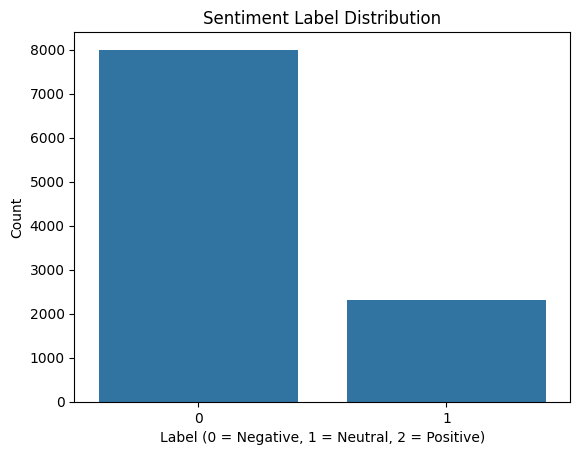

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Label distribution plot
sns.countplot(x='label', data=df)
plt.title("Sentiment Label Distribution")
plt.xlabel("Label (0 = Negative, 1 = Neutral, 2 = Positive)")
plt.ylabel("Count")
plt.show()


Feature Extraction (TF-IDF Vectorization)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize clean text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])

# Target labels
y = df['label']

# Print feature matrix shape
print("TF-IDF Matrix Shape:", X_tfidf.shape)


TF-IDF Matrix Shape: (10314, 5000)


Model Training(Naive Bayes)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1600
           1       0.99      0.73      0.84       463

    accuracy                           0.94      2063
   macro avg       0.96      0.86      0.90      2063
weighted avg       0.94      0.94      0.93      2063



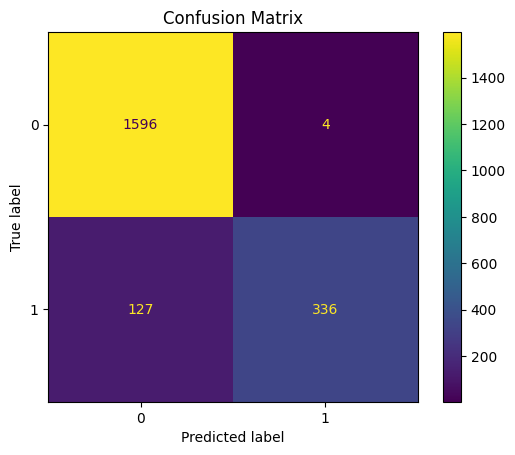

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = nb_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


Hyper Parameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

# Try different smoothing values for alpha
params = {'alpha': [0.1, 0.5, 1.0]}

# Grid search for best alpha
grid_search = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'alpha': 0.1}
Best CV Score: 0.9449774792136996


final model prediction

In [9]:
# Use best model for prediction (from grid search)
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

# Predict again
final_preds = final_model.predict(X_test)

# Evaluate
print("Final Model Evaluation:")
print(classification_report(y_test, final_preds))


Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1600
           1       0.91      0.86      0.88       463

    accuracy                           0.95      2063
   macro avg       0.93      0.92      0.93      2063
weighted avg       0.95      0.95      0.95      2063

